In [1]:
import numpy as np
import torch
import torch.nn as nn
import cv2
import matplotlib.pyplot as plt

/home/beomgon/anaconda3/envs/pytorch/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


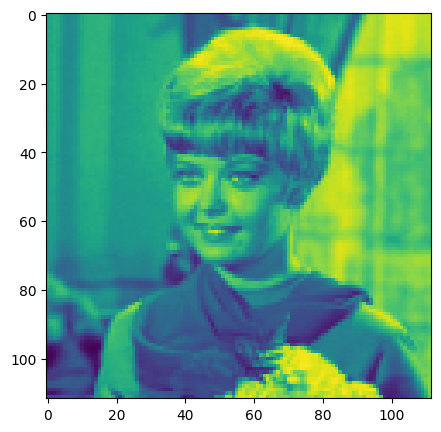

In [21]:
im = cv2.imread("zelda.png")
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im = cv2.resize(im, (112, 112))
f = plt.figure(figsize=(5,5))
plt.imshow(im/255.)


In [7]:
a = torch.nn.init.orthogonal_(torch.randn(64,64))

In [8]:
a.T@a

tensor([[ 1.0000e+00,  7.0836e-09, -6.1269e-09,  ...,  3.3904e-08,
          2.2178e-08,  4.7813e-09],
        [ 7.0836e-09,  1.0000e+00,  2.3983e-09,  ...,  5.8231e-09,
         -1.0009e-09, -1.8506e-08],
        [-6.1269e-09,  2.3983e-09,  1.0000e+00,  ...,  2.1473e-08,
         -1.9751e-08,  2.8485e-08],
        ...,
        [ 3.3904e-08,  5.8231e-09,  2.1473e-08,  ...,  1.0000e+00,
         -2.3221e-07,  2.5247e-07],
        [ 2.2178e-08, -1.0009e-09, -1.9751e-08,  ..., -2.3221e-07,
          1.0000e+00, -7.2094e-08],
        [ 4.7813e-09, -1.8506e-08,  2.8485e-08,  ...,  2.5247e-07,
         -7.2094e-08,  1.0000e+00]])

In [30]:
a = a.reshape(64,1,8,8)
a.shape

torch.Size([64, 1, 8, 8])

In [40]:
conv = torch.nn.Conv2d(1, 64, (8,8), (8,8), groups=1, bias=False)
print(conv.weight.shape)
conv.weight = torch.nn.Parameter(torch.tensor(a, dtype=torch.float32))

torch.Size([64, 1, 8, 8])


/tmp/ipykernel_263322/522451963.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  conv.weight = torch.nn.Parameter(torch.tensor(a, dtype=torch.float32))


In [41]:
# torch.tensor(im/255.)[None, None, :,:,].shape

In [43]:
out = conv(torch.tensor(im/255., dtype=torch.float32)[None, None, :,:,])

In [44]:
out.shape

torch.Size([1, 64, 14, 14])

In [50]:
# out1 = (out.reshape(8,8,14,14).permute(0,2,1,3)).reshape(8*14,8*14)

In [53]:
# plt.imshow(out1.detach().numpy())

In [ ]:
# https://kr.mathworks.com/help/images/discrete-cosine-transform.html

In [54]:
total_dct_coeff = []
for p in range(8) :
    if p == 0 :
        ap = 1/np.sqrt(8)
    else :
        ap = 0.5
    for q in range(8) :
        if q == 0 :
            aq = 1/np.sqrt(8)
        else :
            aq = 0.5  
            
        coeff = []
        for m in range(8) :
            for n in range(8) :
                co = np.cos(np.pi*(2*m+1)*p/16) * np.cos(np.pi*(2*n+1)*q/16) * ap*aq
                coeff.append(co)
        total_dct_coeff.append(coeff)

In [60]:
dc_coeff = np.array(total_dct_coeff)
dc_coeff.shape

(64, 64)

In [89]:
# dc_coeff.reshape(64,1,8,8)
conv.weight = torch.nn.Parameter(torch.tensor(dc_coeff.reshape(64,1,8,8), dtype=torch.float32))
conv.weight.shape

torch.Size([64, 1, 8, 8])

In [91]:
im = cv2.imread("zelda.png")
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im = np.transpose(cv2.resize(im, (112, 112)))
im.shape

(112, 112)

In [92]:
print(im.shape)
out = conv(torch.tensor(im/255., dtype=torch.float32)[None,None, :,:,])

(112, 112)


In [93]:
out.shape

torch.Size([1, 64, 14, 14])

In [73]:
# plt.imshow(out[0,0,:,:].detach().numpy())

In [72]:
# plt.imshow(out[0,32,:,:].detach().numpy())

In [79]:
out_ = out.detach().numpy().reshape(8,8, 14,14)
out_ = np.transpose(out_, (2,3,0,1))
out_.shape

(14, 14, 8, 8)

In [80]:
out_ = np.transpose(out_, (0,2,1,3)).reshape(8*14, 8*14)

In [81]:
out_.shape

(112, 112)

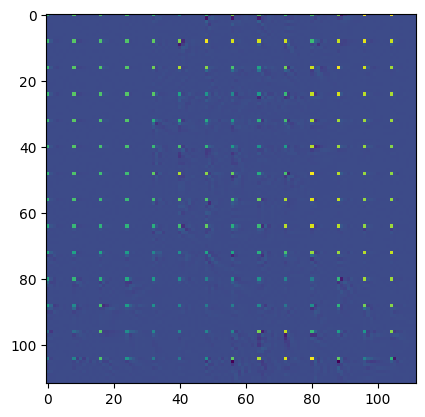

In [82]:
plt.imshow(out_)